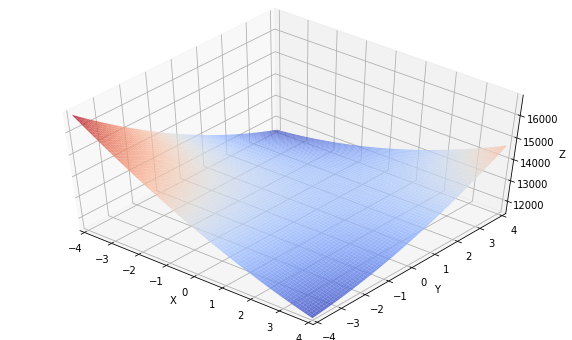

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

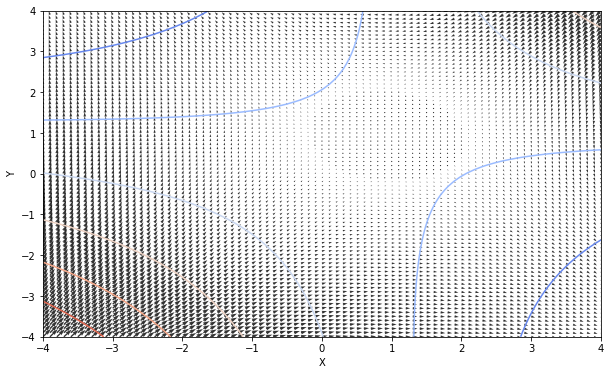

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm
from google.colab import files
from autograd import numpy as np
from autograd import elementwise_grad

def surface_gradientfield(X_range, Y_range, optimization_step, function):
  x, y = np.meshgrid(np.arange(X_range[0], X_range[1] + optimization_step, optimization_step), 
        np.arange(Y_range[0], Y_range[1] + optimization_step, optimization_step))
  z = function(x, y)

  # surface
  fig = plt.figure(figsize=(10, 6))
  axs = plt.axes(projection='3d', elev=50, azim=-50)
  axs.set_xlim((X_range[0], X_range[1]))
  axs.set_ylim((Y_range[0], Y_range[1]))
  axs.set_xlabel('X')
  axs.set_ylabel('Y')
  axs.set_zlabel('Z')

  axs.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.coolwarm)

  plt.savefig('./surface.pdf')
  plt.show()
  files.download('./surface.pdf')

  # gradient field
  fig, axs = plt.subplots(figsize=(10, 6))
  axs.contour(x, y, z, cmap=plt.cm.coolwarm)
  axs.quiver(x, y, x - elementwise_grad(function, argnum=0)(x, y), y - elementwise_grad(function, argnum=1)(x, y), alpha=.8)

  axs.set_xlim((X_range[0], X_range[1]))
  axs.set_ylim((Y_range[0], Y_range[1]))
  axs.set_xlabel('X')
  axs.set_ylabel('Y')

  plt.savefig('./gradient_field.pdf')
  plt.show()
  files.download('./gradient_field.pdf')

X_range, Y_range = [-4., 4.], [-4., 4.]
function = lambda x, y: (x * y + 66) ** 2 + (x * y) ** 2 + (x - 66) ** 2 + (y - 66) ** 2
optimization_step = .1
surface_gradientfield(X_range, Y_range, optimization_step, function)

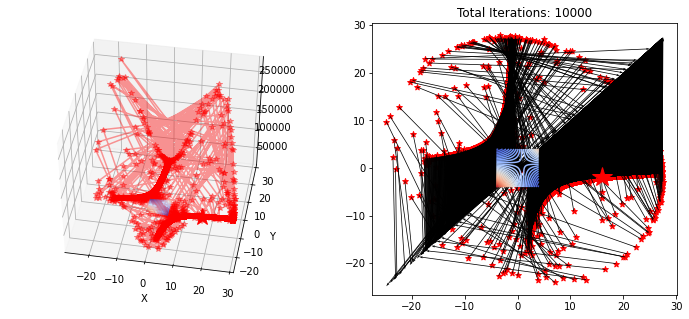

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import autograd
import matplotlib.pyplot as plt

from google.colab import files
from autograd import numpy as np
from matplotlib.colors import LogNorm

def SGD(xrange, yrange, sta, optimization_step, function):
  cal_grad0, cal_grad1 = autograd.grad(function, argnum=0), autograd.grad(function, argnum=1)

  current_iter, error, res = 0, 10, sta
  ix, iy, cnt = np.empty(0), np.empty(0), np.empty(0)
  x, y = res[0], res[1]

  while np.linalg.norm(error) > 1e-4 and current_iter < 10000:
      current_iter += 1

      ix = np.append(ix, x)
      iy = np.append(iy, y)
      cnt = np.append(cnt, current_iter)

      pre_res = res
      grad_res = np.array([cal_grad0(x, y), cal_grad1(x, y)])
      res = res - 0.00125 * grad_res
      error = res - pre_res
      x, y = res[0], res[1]

  xx, yy = np.meshgrid(np.arange(xrange[0], xrange[1] + optimization_step, optimization_step), 
        np.arange(yrange[0], yrange[1] + optimization_step, optimization_step))
  zz = function(xx, yy)

  fig = plt.figure(figsize=(12, 5))
  subfig = fig.add_subplot(1, 2, 1, projection='3d')
  subfig.plot(ix, iy, function(ix, iy), color='r', marker='*', alpha=.4)
  subfig.plot(*res.reshape(-1, 1), function(*res.reshape(-1, 1)), 'r*', markersize=18)
  subfig.plot_surface(xx, yy, zz, norm=LogNorm(), rstride=5, cstride=5, edgecolor='none', alpha=.8, cmap=plt.cm.coolwarm)
  
  subfig.view_init(45, 280)
  subfig.set_xlabel('X')
  subfig.set_ylabel('Y')

  subfig = fig.add_subplot(1, 2, 2)
  subfig.scatter(ix, iy, color='r', marker='*')
  subfig.contour(xx, yy, zz, 50, cmap=plt.cm.coolwarm)
  subfig.quiver(ix[:-1], iy[:-1], ix[1:] - ix[:-1], ix[1:] - iy[:-1], scale_units='xy', angles='xy', scale=1, color='k')
  subfig.plot(*res.reshape(-1, 1), 'r*', markersize=20)
  subfig.set_title('Total Iterations: {}'.format(len(cnt)))
  
  plt.savefig('./sgd.pdf')
  plt.show()
  files.download('./sgd.pdf')

X_range, Y_range = [-4., 4.], [-4., 4.]
optimization_step = 0.1
function = lambda x, y: (x * y + 66) ** 2 + (x * y) ** 2 + (x - 66) ** 2 + (y - 66) ** 2
SGD(X_range, Y_range, np.array([-2., 2.]), optimization_step, function)

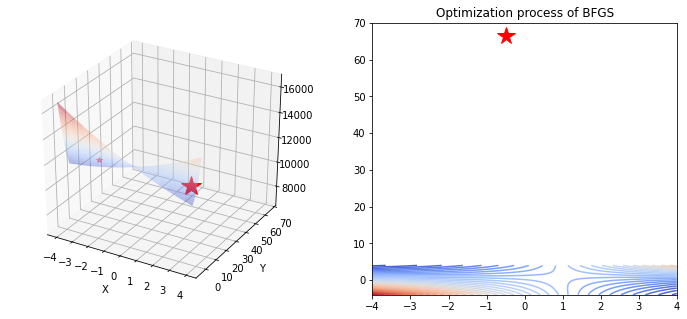

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

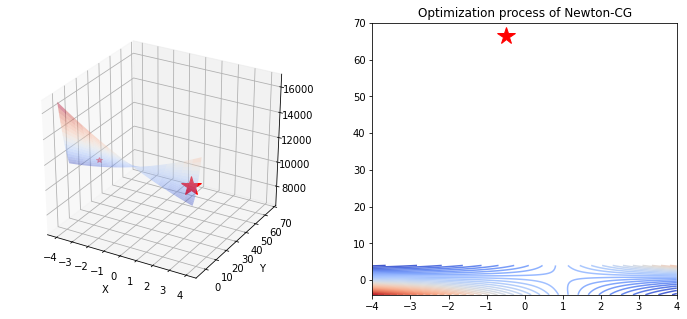

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

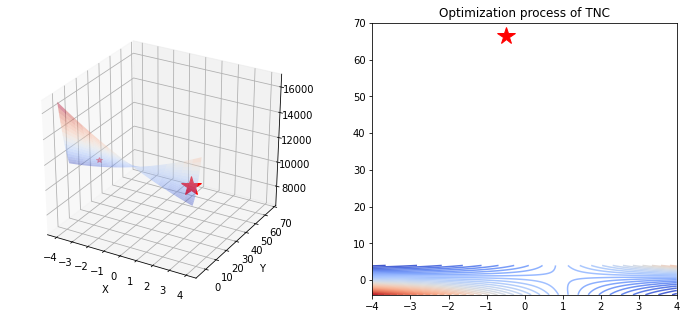

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method COBYLA does not use gradient information (jac).
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:531: RuntimeWarning: Method COBYLA does not support callback.
  warn('Method %s does not support callback.' % method, RuntimeWarning)


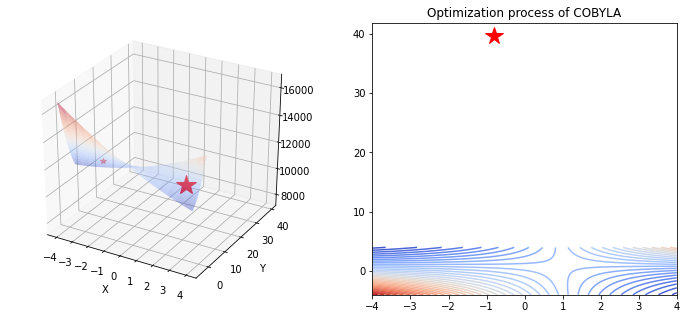

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)


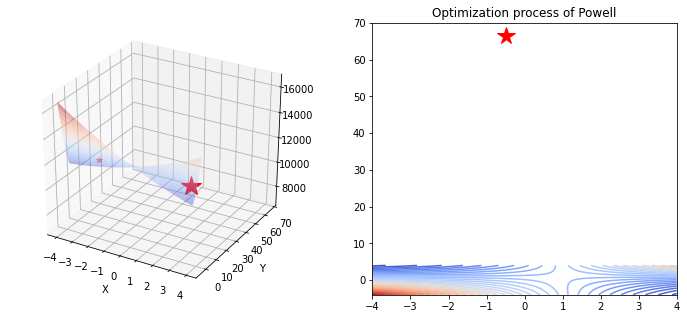

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
from scipy.optimize import minimize
from autograd import value_and_grad

def other_optimization(X_range, Y_range, optimization_step, name, sta, function):
  x, y = np.meshgrid(np.arange(X_range[0], X_range[1] + optimization_step, optimization_step), 
        np.arange(Y_range[0], Y_range[1] + optimization_step, optimization_step))
  z = function(x, y)

  # record answer
  function_scipy = value_and_grad(lambda args: function(*args))
  tmp_path = [sta]
  def record_path(self, tmp_path=[]): 
    def record_path_sub(x):
        tmp_path.append(np.copy(x))
    return record_path_sub
  res = minimize(function_scipy, x0=sta, method=name, jac=True, tol=1e-20, callback=record_path(tmp_path))
  sol_path = np.array(tmp_path).T

  # plot
  fig = plt.figure(figsize = (12, 5))
  axs = fig.add_subplot(1, 2, 1, projection='3d')
  axs.plot_surface(x, y, z, norm=LogNorm(), rstride=5, cstride=5, edgecolor='none', alpha=.4, cmap=plt.cm.coolwarm) 
  axs.plot(sol_path[0], sol_path[1], function(sol_path[0], sol_path[1]), color = 'r', marker = '*', alpha = .4) 
  axs.plot(*res['x'].reshape(-1,1), function(*res['x'].reshape(-1,1)), 'r*', markersize=20)
  axs.set_xlabel('X')
  axs.set_ylabel('Y')
  axs = fig.add_subplot(1, 2, 2)
  axs.contour(x, y, z, 50, cmap=plt.cm.coolwarm)
  axs.quiver(sol_path[0,:-1], sol_path[1,:-1], sol_path[0,1:]-sol_path[0,:-1], sol_path[1,1:]-sol_path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
  axs.plot(*res['x'].reshape(-1,1), 'r*', markersize=18)
  plt.title('Optimization process of {}'.format(name))
  plt.savefig('./{}.pdf'.format(name))
  plt.show()
  files.download('./{}.pdf'.format(name))

X_range, Y_range = [-4., 4.], [-4., 4.]
optimization_step = 0.1
function = lambda x, y: (x * y + 66) ** 2 + (x * y) ** 2 + (x - 66) ** 2 + (y - 66) ** 2
other_optimization(X_range, Y_range, 0.1, 'BFGS', np.array([-2., 2.]), function)
other_optimization(X_range, Y_range, 0.1, 'Newton-CG', np.array([-2., 2.]), function)
other_optimization(X_range, Y_range, 0.1, 'TNC', np.array([-2., 2.]), function)
other_optimization(X_range, Y_range, 0.1, 'COBYLA', np.array([-2., 2.]), function)
other_optimization(X_range, Y_range, 0.1, 'Powell', np.array([-2., 2.]), function)